In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\Shyam\\Downloads\\brainandbody.csv',sep=',')


FileNotFoundError: File b'C:\\Users\\Shyam\\Downloads\\brainandbody.csv' does not exist

In [12]:
import pandas as pd
import datetime
import pandas.io as data, web
import pandas.io.data as web
import matplotlib.pyplot as plt
from matplotlib import style

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2015, 8, 22)
df = web.DataReader("XOM", "yahoo", start, end)
print(df.head())


style.use('fivethirtyeight')

df['High'].plot()
plt.legend()
plt.show()

ImportError: No module named web

In [ ]:
web_stats = {'Day':[1,2,3,4,5,6],
             'Visitors':[43,34,65,56,29,76],
             'Bounce Rate':[65,67,78,65,45,52]}

df = pd.DataFrame(web_stats)
df.set_index("Day", inplace=True)
df[df['Visitors']>50]



In [6]:
import quandl
import html5lib
import lxml
from bs4 import BeautifulSoup
mydata = quandl.get("ZILL/N00996_4B", authtoken="11GstZ6fzE366WL6SZ6_")
states_mydata_AK = quandl.get("FMAC/HPI_AK", authtoken="11GstZ6fzE366WL6SZ6_")
states_mydata_NC= quandl.get("FMAC/HPI_AK", authtoken="11GstZ6fzE366WL6SZ6_")

states_mydata_NC

#fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
#fiddy_states

,Value
Date,
1975-01-31,34.447924
1975-02-28,34.958144
1975-03-31,35.480144
1975-04-30,36.024334
1975-05-31,36.617578
1975-06-30,37.251232
1975-07-31,37.883966
1975-08-31,38.459793
1975-09-30,38.960996


In [27]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')


def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    print fiddy_states[0][0][1:]
    return fiddy_states[0][0][1:]
    

def grab_initial_state_data():
    states = state_list()

    main_df = pd.DataFrame()

    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken="11GstZ6fzE366WL6SZ6_")
        print(df)
        #df[abbv] = (df[abbv]-df[abbv][0]) / df[abbv][0] * 100.0
        print(df.head())
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
    pickle_out = open('fiddy_states3','wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()

def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA", authtoken=api_key)
    df["United States"] = (df["United States"]-df["United States"][0]) / df["United States"][0] * 100.0
    return df

grab_initial_state_data()

# fig = plt.figure()
# ax1 = plt.subplot2grid((1,1), (0,0))

# HPI_data = pd.read_pickle('fiddy_states3')
# HPI_State_Correlation = HPI_data.corr()

1     AL
2     AK
3     AZ
4     AR
5     CA
6     CO
7     CT
8     DE
9     FL
10    GA
11    HI
12    ID
13    IL
14    IN
15    IA
16    KS
17    KY
18    LA
19    ME
20    MD
21    MA
22    MI
23    MN
24    MS
25    MO
26    MT
27    NE
28    NV
29    NH
30    NJ
31    NM
32    NY
33    NC
34    ND
35    OH
36    OK
37    OR
38    PA
39    RI
40    SC
41    SD
42    TN
43    TX
44    UT
45    VT
46    VA
47    WA
48    WV
49    WI
50    WY
Name: 0, dtype: object
                 Value
Date                  
1975-01-31   35.311045
1975-02-28   35.533128
1975-03-31   35.792522
1975-04-30   36.109691
1975-05-31   36.411170
1975-06-30   36.579569
1975-07-31   36.549579
1975-08-31   36.355201
1975-09-30   36.116257
1975-10-31   35.990729
1975-11-30   36.072233
1975-12-31   36.388245
1976-01-31   36.913648
1976-02-29   37.524537
1976-03-31   38.062616
1976-04-30   38.432978
1976-05-31   38.640694
1976-06-30   38.734440
1976-07-31   38.779124
1976-08-31   38.790885
1976-09-30   38.78182

ValueError: columns overlap but no suffix specified: Index([u'Value'], dtype='object')

                 Value
Date                  
1975-01-31   32.638435
1975-02-01         NaN
1975-02-02         NaN
1975-02-03         NaN
1975-02-04         NaN
1975-02-05         NaN
1975-02-06         NaN
1975-02-07         NaN
1975-02-08         NaN
1975-02-09         NaN
1975-02-10         NaN
1975-02-11         NaN
1975-02-12         NaN
1975-02-13         NaN
1975-02-14         NaN
1975-02-15         NaN
1975-02-16         NaN
1975-02-17         NaN
1975-02-18         NaN
1975-02-19         NaN
1975-02-20         NaN
1975-02-21         NaN
1975-02-22         NaN
1975-02-23         NaN
1975-02-24         NaN
1975-02-25         NaN
1975-02-26         NaN
1975-02-27         NaN
1975-02-28   32.964160
1975-03-01         NaN
...                ...
2016-12-02         NaN
2016-12-03         NaN
2016-12-04         NaN
2016-12-05         NaN
2016-12-06         NaN
2016-12-07         NaN
2016-12-08         NaN
2016-12-09         NaN
2016-12-10         NaN
2016-12-11         NaN
2016-12-12 

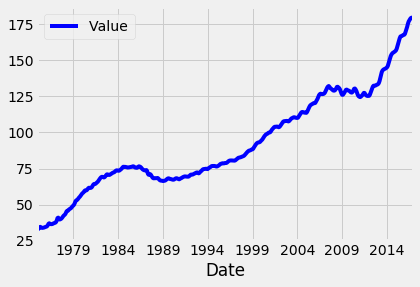

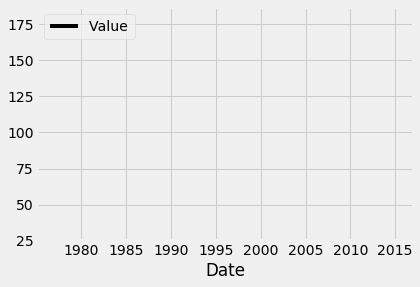

In [100]:
import matplotlib.pyplot as plt
query = "FMAC/HPI_TX"
TX1yr = quandl.get(query, authtoken="11GstZ6fzE366WL6SZ6_")
#print(TX1yr)
TX1yr_1 = TX1yr.resample('A').mean()
print(TX1yr_1)

TX1yr.plot(color='b')
TX1yr_1.plot(color='k')

plt.legend()
plt.show()

In [115]:
#Missing data
HPI_data = pd.DataFrame()
TX1yr_1 = TX1yr.resample('M').mean()
#print(TX1yr_1)
HPI_data['TX1yr'] = TX1yr_1['Value']
HPI_data['TX1'] = TX1yr['Value']
print(HPI_data.dropna(inplace=True))
#print(HPI_data.fillna(method="bfill")) #bfill from backward, ffill from before


HPI_data['Rolling_avg'] = pd.rolling_mean(HPI_data['TX1yr'],12)
print(HPI_data)

None
                 TX1yr         TX1  Rolling_avg
Date                                           
1975-01-31   32.638435   32.638435          NaN
1975-02-28   32.964160   32.964160          NaN
1975-03-31   33.539078   33.539078          NaN
1975-04-30   34.370555   34.370555          NaN
1975-05-31   34.619957   34.619957          NaN
1975-06-30   34.205700   34.205700          NaN
1975-07-31   33.929778   33.929778          NaN
1975-08-31   33.907569   33.907569          NaN
1975-09-30   34.001388   34.001388          NaN
1975-10-31   34.131263   34.131263          NaN
1975-11-30   34.361128   34.361128          NaN
1975-12-31   34.571164   34.571164    33.936681
1976-01-31   34.706542   34.706542    34.109024
1976-02-29   35.008914   35.008914    34.279420
1976-03-31   35.731703   35.731703    34.462138
1976-04-30   36.763316   36.763316    34.661535
1976-05-31   37.084996   37.084996    34.866955
1976-06-30   36.689992   36.689992    35.073979
1976-07-31   36.490754   36.490754 

C:\Users\Shyam\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()


In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df.T
df.loc['20130102':'20130104',['A','B']]
df.mean()

print(df)
df.apply(np.cumsum)

                   A         B         C         D
2013-01-01  0.922314  0.155346  1.076834 -0.539990
2013-01-02  1.252231 -0.044384  0.280634 -0.158834
2013-01-03 -0.425057  2.071286  0.083108  0.022824
2013-01-04 -0.371781 -0.600651  0.106882  1.847421
2013-01-05  0.396675  1.293635 -0.043560 -0.751397
2013-01-06  0.666099  0.634689 -0.577176 -0.915682


,A,B,C,D
2013-01-01,0.922314,0.155346,1.076834,-0.539990
2013-01-02,2.174544,0.110962,1.357467,-0.698824
2013-01-03,1.749488,2.182248,1.440575,-0.676000
2013-01-04,1.377707,1.581598,1.547457,1.171421
2013-01-05,1.774382,2.875232,1.503897,0.420025
2013-01-06,2.440481,3.509922,0.926721,-0.495657


In [15]:
np.random.randn(10, 4)

array([-0.32238283,  2.01161631, -1.31022641, -1.44777212, -0.51915033,
        1.89211925, -0.81471087,  1.13162963, -0.27132965, -1.15174428])

In [20]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                        'B' : ['A', 'B', 'C'] * 4,
                        'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                        'D' : np.random.randn(12),
                        'E' : np.random.randn(12)})
print(df)
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

        A  B    C         D         E
0     one  A  foo -0.061722  0.529278
1     one  B  foo -0.704214 -0.983644
2     two  C  foo -0.163222 -0.191370
3   three  A  bar -1.406489 -1.441498
4     one  B  bar -0.286431 -1.208682
5     one  C  bar  0.156564  1.499852
6     two  A  foo  0.196543 -0.450272
7   three  B  foo  0.101575  0.324378
8     one  C  foo  1.789770 -0.258833
9     one  A  bar -1.700154 -0.372608
10    two  B  bar -1.147410 -0.448372
11  three  C  bar -0.000268  0.811884


C             bar       foo
A     B                    
one   A -1.700154 -0.061722
      B -0.286431 -0.704214
      C  0.156564  1.789770
three A -1.406489       NaN
      B       NaN  0.101575
      C -0.000268       NaN
two   A       NaN  0.196543
      B -1.147410       NaN
      C       NaN -0.163222

In [41]:
pd.date_range('20121228', periods=100, freq='D')

DatetimeIndex(['2012-12-28', '2012-12-29', '2012-12-30', '2012-12-31',
               '2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10', '2013-01-11', '2013-01-12',
               '2013-01-13', '2013-01-14', '2013-01-15', '2013-01-16',
               '2013-01-17', '2013-01-18', '2013-01-19', '2013-01-20',
               '2013-01-21', '2013-01-22', '2013-01-23', '2013-01-24',
               '2013-01-25', '2013-01-26', '2013-01-27', '2013-01-28',
               '2013-01-29', '2013-01-30', '2013-01-31', '2013-02-01',
               '2013-02-02', '2013-02-03', '2013-02-04', '2013-02-05',
               '2013-02-06', '2013-02-07', '2013-02-08', '2013-02-09',
               '2013-02-10', '2013-02-11', '2013-02-12', '2013-02-13',
               '2013-02-14', '2013-02-15', '2013-02-16', '2013-02-17',
               '2013-02-18', '2013-02-19', '2013-02-20', '2013-02-21',
      

In [45]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df["grade"] 

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]